Apenas importando as bibliotecas que serão necessárias:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1)** Encontre a raiz de f(x) = $x^3$ + cos(x) tomando um erro $|f(x_k)|$ < 0.000001, ou seja *e* = $10^{-6}$. Aproxime, a cada iteração, os resultados para 8 dígitos significativos:

A função:

In [2]:
def f1(x):
    return x**3 + np.cos(x)

**a)** Obtenha, graficamente, o intervalo [a, b] onde se encontra a
raiz.

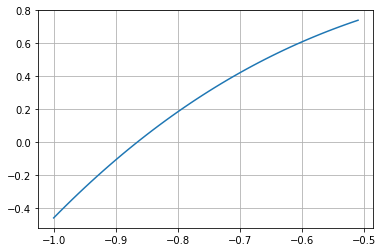

In [3]:
a = -1
b = -0.5
x = np.arange(a,b,0.01)

plt.plot(x,f1(x))

plt.grid()
plt.show()

**b)** Implemente e aplique o método da Bisseção.

In [4]:
def bissecao(f,a,b,emax,kmax=float('inf')):
    """
    Utiliza o metodo da Bisseção para achar a raiz de uma função (f) em um intervalo [a,b],
    até que a precisão máxima (emax) ou um número máximo de iterações (kmax - opcional) seja alcançado.
    
    Retorna a raiz encontrada e o número de iterações.
    """
    k=0
    erro = float('inf')
    x=None
    while k<kmax and abs(erro)>emax:
        x = (a+b)/2
        #colocando o número pra 8 algarismos signficativos:
        x = float(f'{x:.8}')
        if f(a)*f(x)<0:
            b = x
        else:
            a = x
        erro = f(x)
        k+=1
    return x,k

x,k=bissecao(f1,a,b,0.000001)
print(f'x = {x}')
print(f'iterações = {k}')

x = -0.86547376
iterações = 19


**c)** Implemente e aplique o método da Falsa posição.

In [ ]:
def falsa_posicao(f,a,b,emax,kmax=float('inf')):
    """
    Utiliza o metodo da Falsa Posição para achar a raiz de uma função (f) em um intervalo [a,b],
    até que a precisão máxima (emax) ou um número máximo de iterações (kmax - opcional) seja alcançado.
    
    Retorna a raiz encontrada e o número de iterações.
    """
    k=0
    erro = float('inf')
    x=None
    while k<kmax and abs(erro)>emax:
        x = (a*f(b)-b*f(a))/(f(b)-f(a))
        #colocando o número pra 8 algarismos signficativos:
        x = float(f'{x:.8}')
        if f(a)*f(x)<0:
            b = x
        else:
            a = x
        erro = f(x)
        k+=1
    return x,k

x,k=falsa_posicao(f1,a,b,0.000001)
print(f'x = {x}')
print(f'iterações = {k}')

x = -0.86547387
iterações = 7


**d)** Compare o número de iterações que cada método precisou para
encontrar a raiz.

Os dois métodos são bem parecidos, apenas havendo diferença na fórmula para calcular o $x_k$. O método da Falsa Posição era esperado de ser melhor do que o da Bisseção, na maioria dos casos, e os números de iterações comprovam isso, em que houve o da Bisseção precisou de 19 iterações e o da Falsa Posição de 7 para que o erro seja menor que $10^{-6}$, havendo uma diferença de 12 iterações.

**2)** Encontre a menor raiz positiva de f(x) = $\frac{x}{2}$ + tan(x) tomando $x_0$ = 1 e um erro $|f(x_k)|$ < 0.000001, ou seja, *e* = $10^{−6}$. Aproxime, a cada iteração, os resultados para 8 dígitos significativos:

A função e sua derivada:

In [5]:
def f2(x):
    return x/2 + np.tan(x)

def df2(x):
    return 1/2 + (1/np.cos(x))**2

**a)** Implemente e aplique o método de Newton.

**OBS:** está convergindo para a raiz x = 0 pois o $x_0$ dado é 1, e é muito baixo. Para convergir para a menor raiz positiva mesmo (2.2889296) basta usar $x_0$ = 2.

In [6]:
def newton(f,df,x,emax,kmax=float('inf')):
    """
    Utiliza o metodo de Newton para achar a raiz de uma função (f) e de sua derivada (df), dado valor inicial (xo)
    até que a precisão máxima (emax) ou um número máximo de iterações (kmax - opcional) seja alcançado.
    
    Retorna a raiz encontrada e o número de iterações.
    """
    k=1
    erro = float('inf')
    while k<kmax and abs(erro)>emax:
        x = x - (f(x)/df(x))
        #colocando o número pra 8 algarismos signficativos:
        x = float(f'{x:.8}')
        erro = f(x)
        k+=1
    return x,k-1

x,k=newton(f2,df2,1,0.000001)
print(f'x = {x}')
print(f'iterações = {k}')

x = 6.6215927e-14
iterações = 4


**b)** Implemente e aplique o método das Secantes.

**OBS:** está convergindo para a raiz x = 0 pois o $x_0$ dado é 1, e é muito baixo. Para convergir para a menor raiz positiva mesmo (2.2889296) basta usar $x_0$ = 2 e $x_1$ = 2.1.

In [7]:
def secante(f,x0,x1,emax,kmax=float('inf')):
    """
    Utiliza o metodo da Secante para achar a raiz de uma função (f), dados 2 valores iniciais (xo e x1)
    até que a precisão máxima (emax) ou um número máximo de iterações (kmax - opcional) seja alcançado.
    
    Retorna a raiz encontrada e o número de iterações.
    """
    k=2
    erro = float('inf')
    while k<kmax and abs(erro)>emax:
        d= (f(x1)-f(x0))/(x1-x0)
        x = x1 - f(x1)/d
        #colocando o número pra 8 algarismos signficativos:
        x = float(f'{x:.8}')
        x0=x1
        x1=x
        erro = f(x)
        k+=1
    return x,k-2

x,k=secante(f2,1,1.1,0.000001)
print(f'x = {x}')
print(f'iterações = {k}')

x = 5.615368e-08
iterações = 5


**c)** Compare o número de iterações que cada método precisou para encontrar a raiz.



O método da Secantes é parecido com o de Newton, mas mais utilizado quando for mais dificil e custoso de calcular a derivada, aproximando-a. O método de Newton tende a convergir mais rápido , pois se usa o valor de fato da derivada, apesar dos dois métodos serem mais rápidos que os demais. O método de Newton precisou de 4 iterações e o da Secante de 5 iterações.